In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.linear_model import LinearRegression
#from pandas.core import datetools

from statsmodels.tools.eval_measures import rmse
import statsmodels.api as sm

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [6]:
location = r"C:\Users\home\Desktop\Machine Learning\datasets\sales.csv"

In [7]:
# load the training data from glass data set
df = pd.read_csv(location, delimiter=r"\s+")

In [9]:
df.head()

,AverageNumberofTickets,NumberofEmployees,ValueofContract,Industry
0,1,51,25750,Retail
1,9,68,25000,Services
2,20,67,40000,Services
3,1,124,35000,Retail
4,8,124,25000,Manufacturing


In [10]:
X, y = df[['NumberofEmployees','ValueofContract']], df.AverageNumberofTickets

In [12]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# compute with formulas from the theory
yhat        = model.predict(X)
SS_Residual = sum((y-yhat)**2)

SS_Total  = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total


adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print (r_squared, adjusted_r_squared)


0.8776433713234001 0.8632484738320354


In [8]:
# compute with sklearn linear_model, 
# although could not find any function to compute 
# adjusted-r-square directly from documentation
print (model.score(X, y), 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))


0.8776433713234001 0.8632484738320354


In [9]:
# compute with statsmodels, by adding intercept manually

X1 = sm.add_constant(X)
result = sm.OLS(y, X1).fit()

print (result.rsquared, result.rsquared_adj)

0.8776433713234001 0.8632484738320354


In [10]:
# compute with statsmodels, another way, using formula
import statsmodels.formula.api as sm
result = sm.ols(formula="AverageNumberofTickets ~ NumberofEmployees + ValueofContract", data=df).fit()
print (result.rsquared, result.rsquared_adj)


0.8776433713234001 0.8632484738320354


#### Basic model (baseline

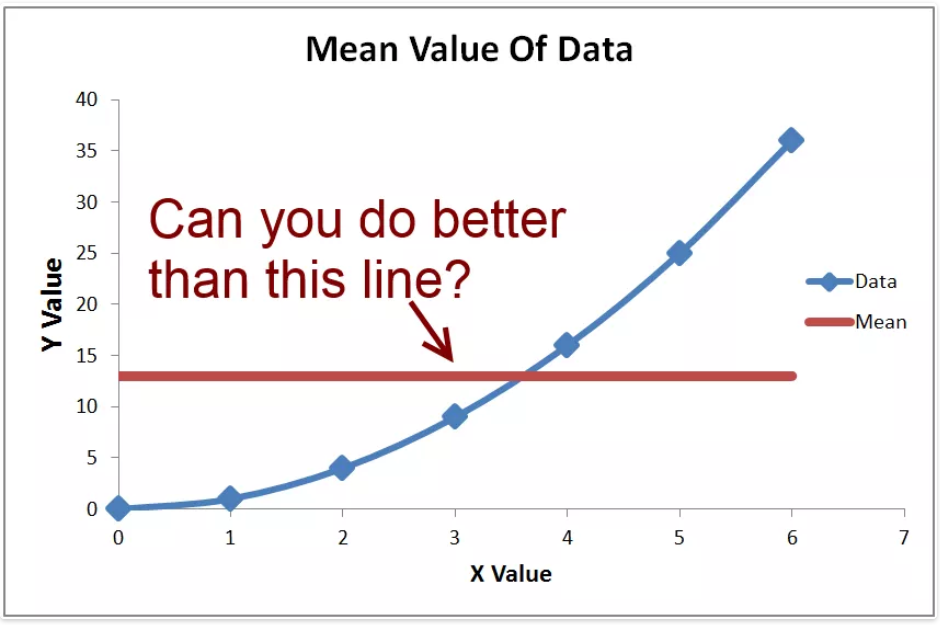

__intuitive understanding__  
- First calculate how much error you would have if you don’t even try to do regression, and instead just __guess the mean__ of all the values.  

- That is the total error.  

- It could be low if all the data is clustered together, or it could be high if the data is spread out.

#### baseline MSE 
- can be thought of as the MSE that the __simplest__ possible model would get.
- The simplest possible model would be to always predict the average of all samples

- Start with the mean value
- For every data point subtract that mean value from the data point value
- Square that difference
- Add up all of the squares.  This results in summed squared error (SST)

$$ \Big \Downarrow MSE(baseline) = SST = \frac{1}{N}\sum_{i=1}^{n}(y - \bar{y})^2 $$

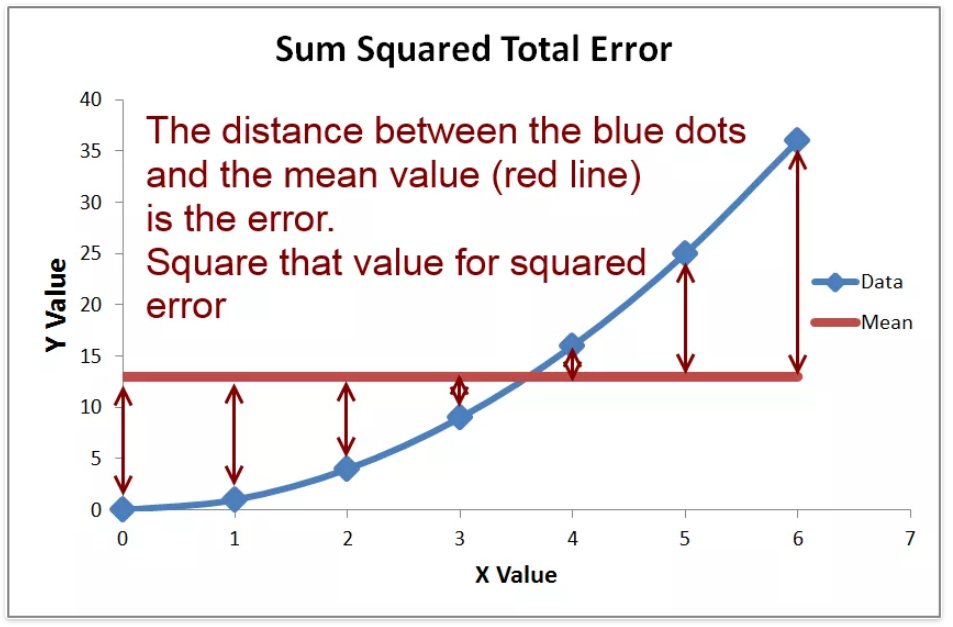

$$ \Big \Downarrow MSE(Model)    = SSE = \sum_{i=1}^{n}(y - \hat{y})^2 $$

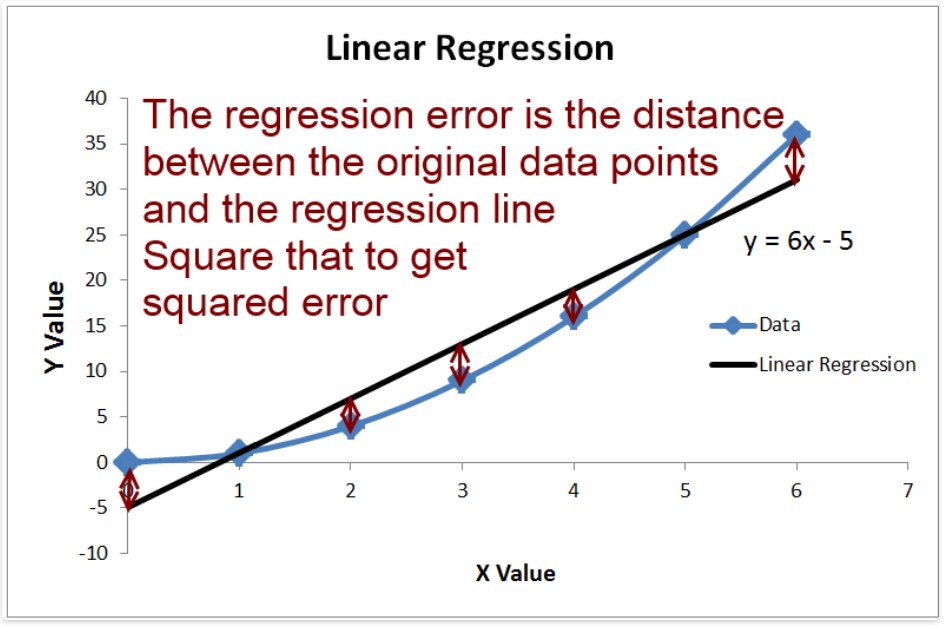

SSM = \frac{1}{N}\sum_{i=1}^{n}(\hat{y} - \bar{y})^2

#### Definition of R² 

- The ratio of the __regression error__ against the __total error__ tells how much of the total error remains in your regression model.  

- Subtracting that ratio from 1.0 gives how much error you removed using the regression analysis. 
- That is R2 !!!

- is the ratio between how good our model is vs how good is the naive mean model.
- R² gives an idea of how many data points fall within the line of the regression equation

$$ R^2 = 1 - \frac{SSE}{SST} $$

$$ R^2 = 1 - (Explained Variation / Total Variation) $$

__e.g.__

say SST = 50 and SSE = 40

so $\frac{SSE}{SST} = 40/ 50 = 0.8 $

this means 80% of the variation of y exists in the residuals. (in the model) i.e not explained by the variation of the predictor(s)

So $R^2 = 1 - 0.8 = 0.2 $


#### Example
In investing, R-squared is generally considered the percentage of a fund or security's movements (y) that can be explained by movements in a benchmark index (X, predictor).

For example, an R-squared for a fixed-income security versus a bond index identifies the security's proportion of price movement that is predictable based on a price movement of the index. 

The same can be applied to a stock versus the BSE/NSE index, or any other relevant index.


#### Range of values for $R^2$

- The maximum value of R² is 1 but minimum can be minus infinity.
- $R^2$ is not truly limited to a lower bound of zero.  We can get a negative $R^2$ value.
- For example, consider a really crappy model predicting highly negative value for all the observations even though y_actual is positive. In this case, R² will be less than 0. This is a __highly unlikely__ scenario but the possibility still exists.

__What Does A Negative R Squared Value Mean?__
- For practical purposes, the lowest $R^2$ you can get is 0, but only because the assumption is that if your regression line cannot be worse than the mean.  
- However if the  regression line is worse than using the mean value, the $R^2$ value that you calculate will be negative.

- __IMP__ : The assertion that the $R^2$ has to be >= 0 is based on the assumption that if you get a negative R squared value, you will dump whatever regression calculation you are using and just go with the mean value!!!!

- The __take away__ for $R^2$ is

- An R2 of 1.0 is the best. It means you have no error in your regression.
- An R2 of 0 means your regression is no better than taking the mean value, i.e. you are not using any information from the other variables
- A Negative R2 means you are doing worse than the mean value. 

- __Maybe summed squared error isn’t the metric that matters most in this case.  __
- - mean absolute error
- - MAPE
- - MPE

__worst case __
Model is as good as the baseline
$$ SSE = SST $$
$$ R^2 = 1 - \frac{SSE}{SST} $$
$$ R^2 = 1 - 1  = 0 $$

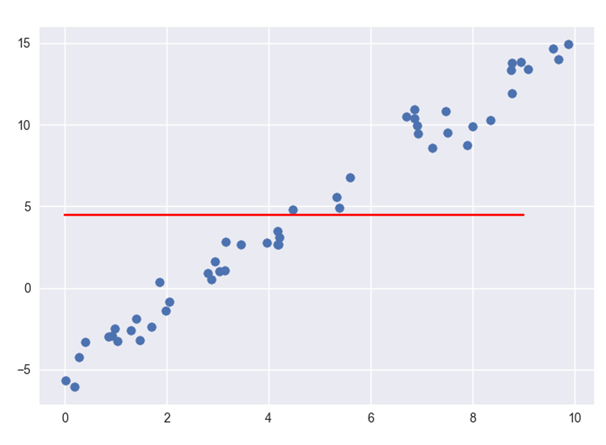
__Best case __
All data points fit the regression line
so 
$$ SSE = 0 $$
$$ R^2 = 1 - \frac{SSE}{SST} $$
$$ R^2 = 1 - 0  = 1 $$

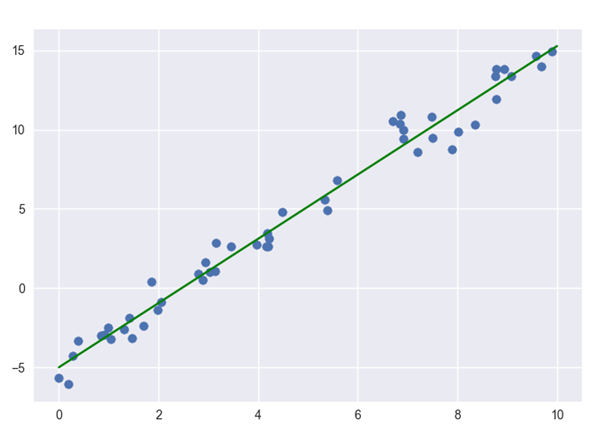

#### Issues with R-squared
R-squared can be artificially made high. That is we can increase the value of R-squared by simply adding more and more independent variables to our model.

In other words R-squared never decreases upon adding more independent variables.

__why does this happen?__

$$ R^2 = 1 - \frac{SSE}{SST} $$

- R-squared will be maximum when SSE/SST will be minimum.

- In order for SSE/SST to be minimum SSE should be minimum.

- Now SSE will decrease as we add more explanatory variables to our model. 
- This is because as we add more explanatory variables to our regression model ,
- our regression model will fit the data points better and hence sum of squared error will reduce.
- Hence R-squared will increase even when the variable is not significant to our model.

#### Adjusted R-squared
Adjusted R-squared simply penalizes the model for adding more useless variables.

In [11]:
import numpy as np

In [12]:
y    = np.array([21,   21,    22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2])
yhat = np.array([21.5, 21.14, 26.1, 20.2, 17.5, 19.7, 14.9, 22.5, 25.1, 18])

In [13]:
yhat

array([21.5 , 21.14, 26.1 , 20.2 , 17.5 , 19.7 , 14.9 , 22.5 , 25.1 ,
       18.  ])

In [14]:
R2 = 1 - sum((y - yhat)**2)/sum((y - np.mean(y))**2)
R2

0.6410828151089257

In [15]:
# Let's assume you have three independent variables in this case.
n = 10
p = 5
adjR2 = 1 - ((1 - R2) * (n - 1))/(n-p-1)
print(adjR2)

0.19243633399508286


In [ ]:
fo
back

In [ ]:
a, B C

In [ ]:
a b c d